## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Loading the dataset

In [2]:
#naming the attributes of the dataset
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']
df=pd.read_csv('auto-mpg.data',sep='\s+',header=None,names=names)

In [3]:
#displaying the first 10 rows of the dataset
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [4]:
#coverting it to csv file
df.to_csv('auto-mpg.csv',index=False)

In [5]:
#checking the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   carname       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Data Cleaning

In [6]:
#As horsepower is object type,checking all the unique values
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [7]:
df=df[df['horsepower']!='?']
df.horsepower=pd.to_numeric(df.horsepower)

<AxesSubplot:>

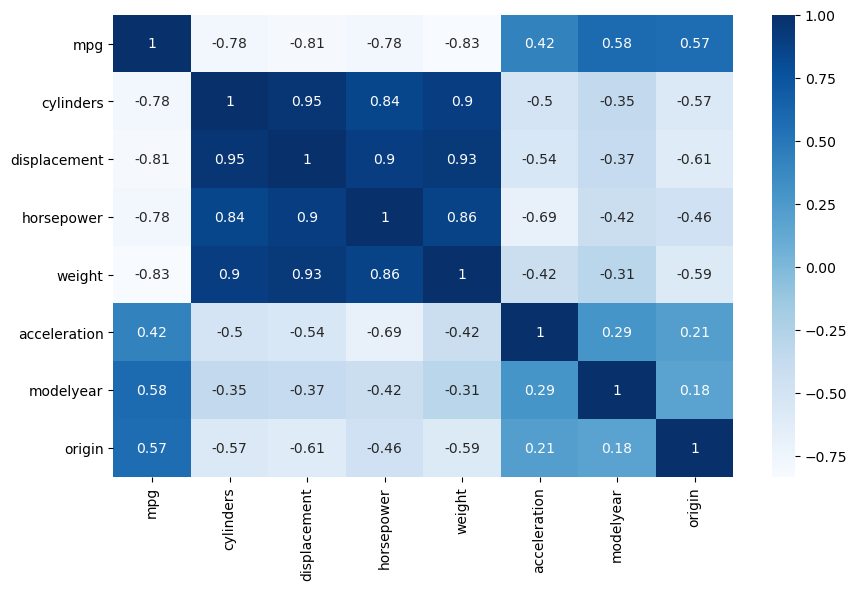

In [8]:
#Visualising the correlation between different parameters through heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Blues,annot=True)

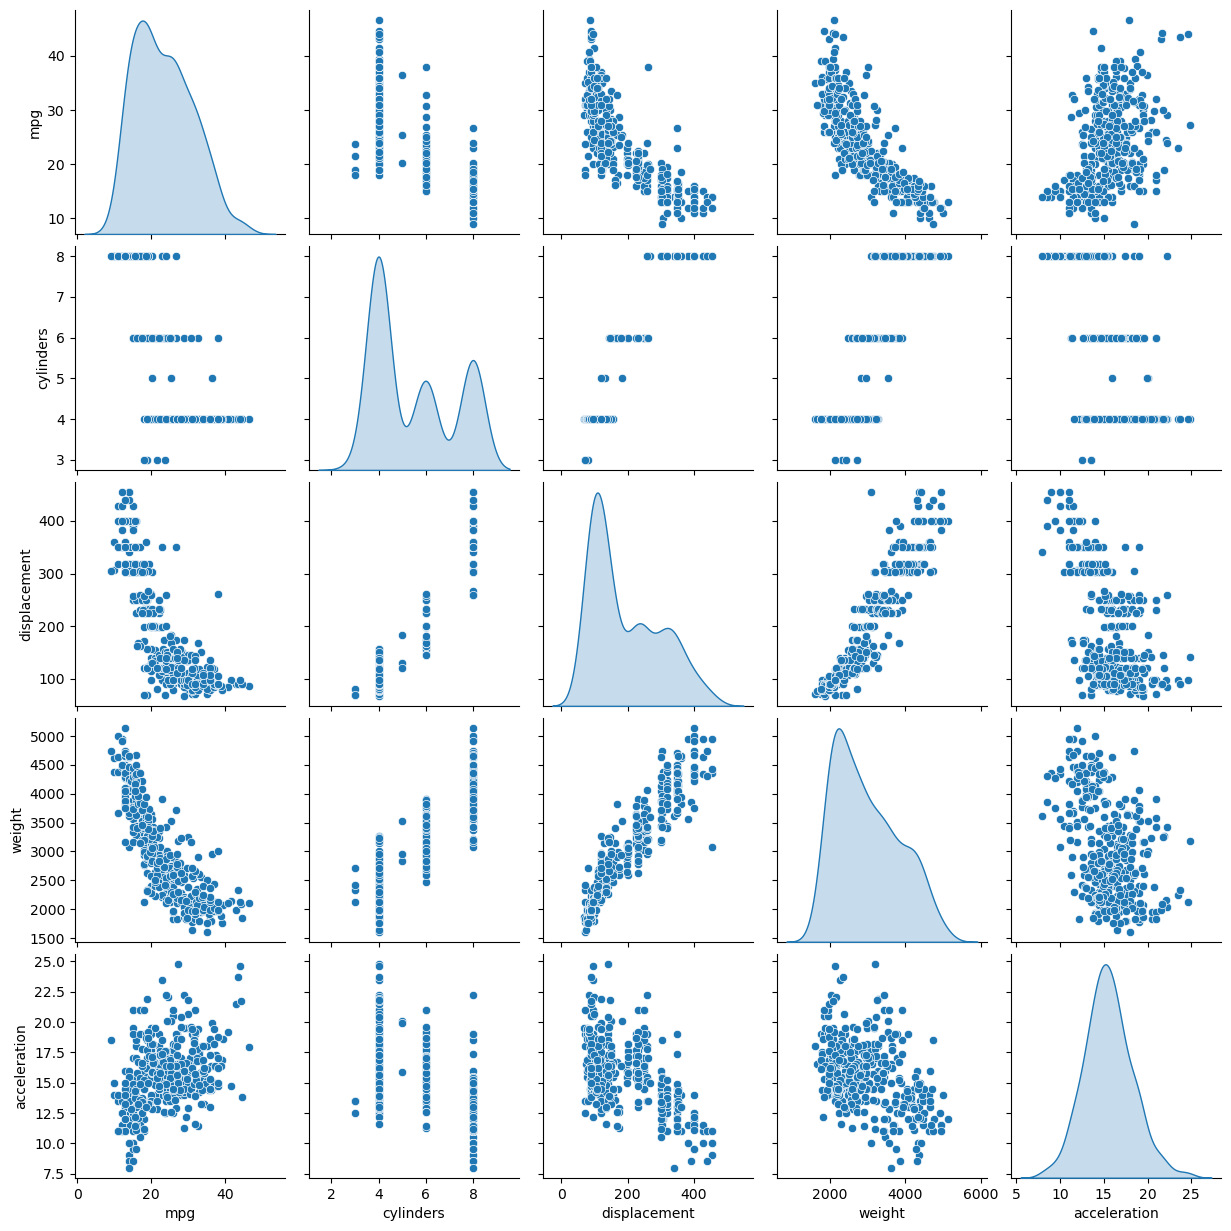

In [11]:
sns.pairplot(df[['mpg','cylinders','displacement','weight','acceleration']],diag_kind='kde')

In [14]:
#Boxcox is a power transformation that eliminates nonlinearity between variables, differing variances, and variable asymmetry
from scipy.stats import boxcox
df['weight']=df[['weight']].apply(lambda x:boxcox(x)[0])

In [15]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,0.506322,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,0.506555,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,0.506234,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,0.506230,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,0.506251,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,0.507244,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,0.507257,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,0.507217,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,0.507323,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,0.506737,8.5,70,1,amc ambassador dpl


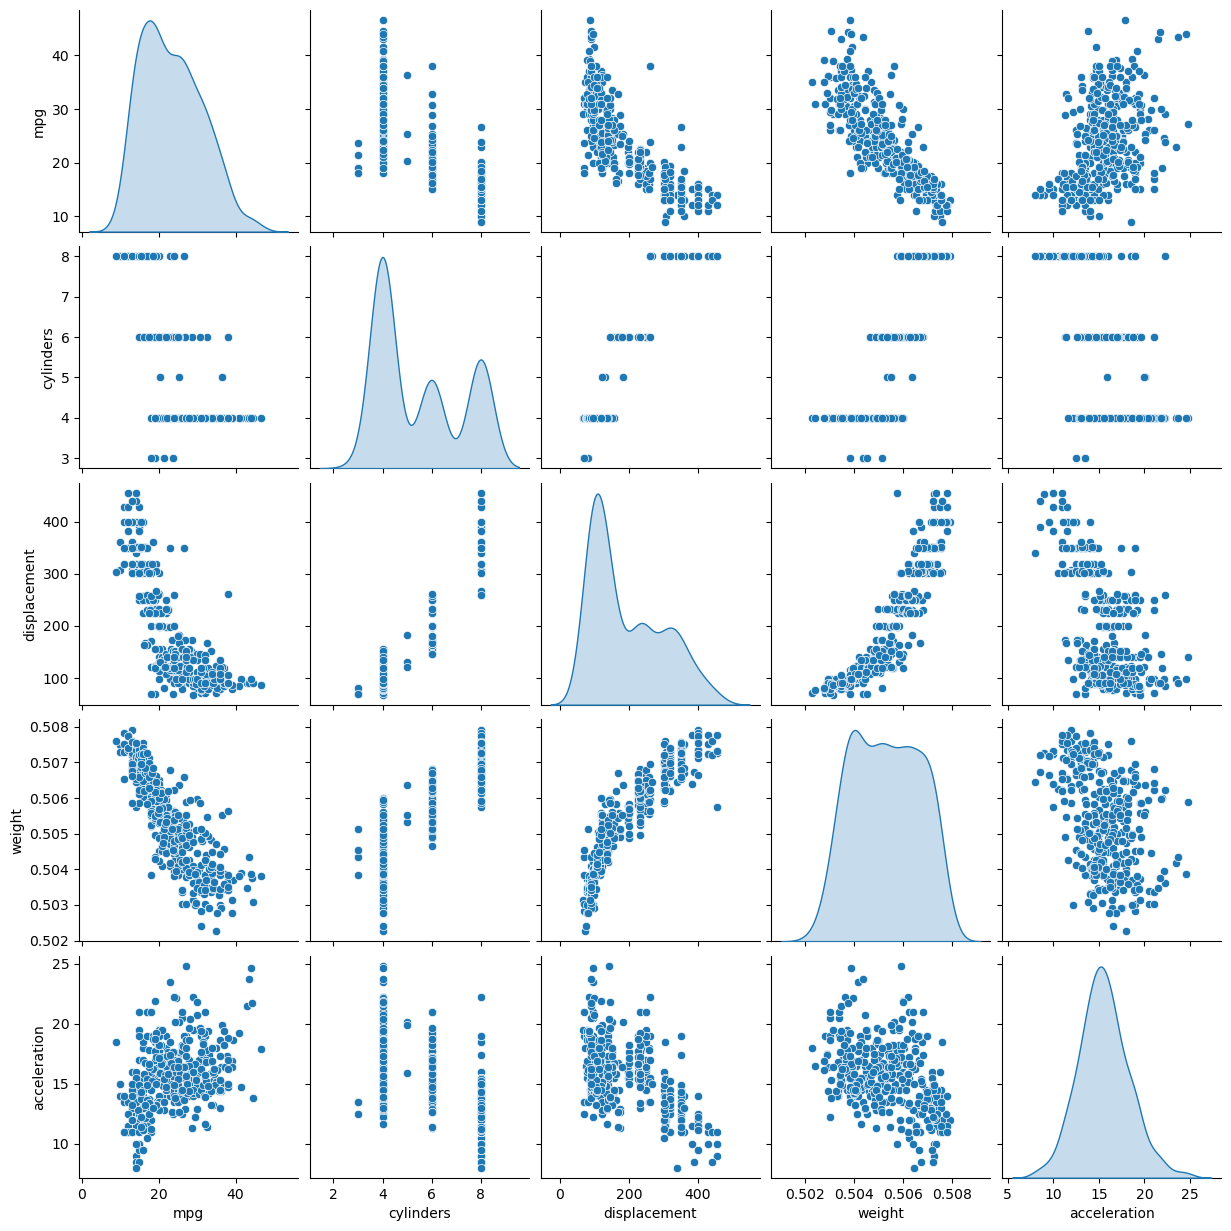

In [16]:
sns.pairplot(df[['mpg','cylinders','displacement','weight','acceleration']],diag_kind='kde')


<AxesSubplot:>

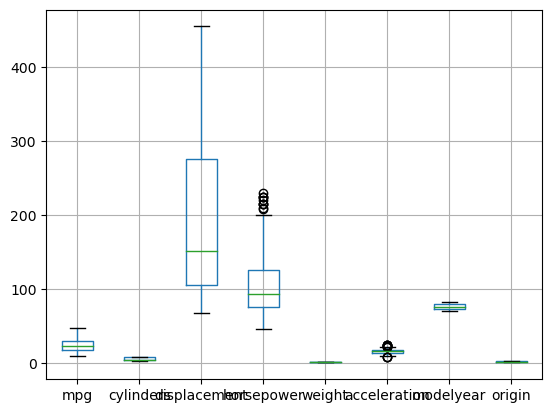

In [17]:
#to display outliers
df.boxplot()

In [18]:
def remove_outliers(df,param):
    
    for x in param:
        q75,q25=np.percentile(df.loc[:,x],[75,25])
        iqr=q75-q25
        max_r=q75+(1.5*iqr)
        min_r=q25-(1.5*iqr)
        
        df.loc[df[x]<min_r,x]=np.nan
        df.loc[df[x]>max_r,x]=np.nan
    
    return df

In [19]:
df=remove_outliers(df,['horsepower'])

In [21]:
#Again checking for null values
df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower      10
weight           0
acceleration     0
modelyear        0
origin           0
carname          0
dtype: int64

In [22]:
#Removing null values
df=df.dropna(axis=0)

## Prepare the data

In [24]:
x=df.drop(['carname','mpg'],axis=1,inplace=False)
y=df['mpg']

In [25]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,8,307.0,130.0,0.506322,12.0,70,1
1,8,350.0,165.0,0.506555,11.5,70,1
2,8,318.0,150.0,0.506234,11.0,70,1
3,8,304.0,150.0,0.506230,12.0,70,1
4,8,302.0,140.0,0.506251,10.5,70,1


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
#checking the shape of X train data
X_train.shape

(267, 7)

In [28]:
#Checking the shape of Y train data
Y_train.shape

(267,)

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state=42)

In [30]:
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred=rf.predict(X_test)

In [36]:
#Calculating the error
from sklearn import metrics

print('Mean Absolute Error: ',metrics.mean_absolute_error(Y_test,y_pred))

Mean Absolute Error:  2.084060869565218
